In [1]:
import numpy
import h5py
import imageio
from numpy.random import uniform
from scipy import ndimage
import matplotlib.pyplot as plt
from jupyterlab_h5web import H5Web

# Data

/tmp/ipykernel_364262/755501884.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  rgb = imageio.imread("https://github.com/scikit-image/scikit-image/raw/ce707744e84e631aa9e014559051cb123f7a65ce/skimage/data/ihc.png")


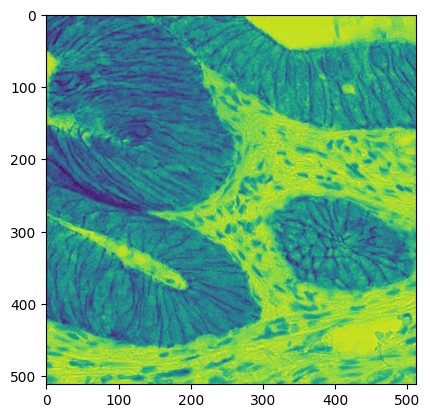

In [2]:
rgb = imageio.imread("https://github.com/scikit-image/scikit-image/raw/ce707744e84e631aa9e014559051cb123f7a65ce/skimage/data/ihc.png")
r, g, b = rgb.T
image = 0.2989 * r + 0.5870 * g + 0.1140 * b

plt.imshow(image)

# Sampling

In [3]:
def sampling_coordinates(image, d, shape=(100, 50)):
    d = -abs(d)  # random motor deviations
    x0 = numpy.linspace(2*d, image.shape[0]-1-2*d, shape[0])
    x1 = numpy.linspace(2*d, image.shape[1]-1-2*d, shape[1])
    x0, x1 = numpy.meshgrid(x0, x1, indexing='ij')
    x0 += uniform(low=-d, high=d, size=shape)
    x1 += uniform(low=-d, high=d, size=shape)
    return x0, x1

In [4]:
def sample_image(image, x0, x1):
    simage = ndimage.map_coordinates(image, [x0.flatten(), x1.flatten()], order=1, cval=numpy.nan)
    return simage.reshape(x0.shape)

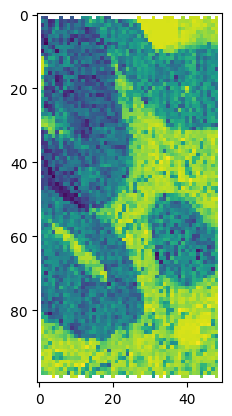

In [5]:
x0, x1 = sampling_coordinates(image, d=3)
simage = sample_image(image, x0, x1)

plt.imshow(simage)

# Single scatter plot: flattened

In [6]:
def save_single_scatter_flat(filename, image, x0, x1):
    assert image.ndim == 2
    assert x0.ndim == 2
    assert x1.ndim == 2
    scanname = "1.1"
    with h5py.File(filename, mode="w") as root:
        scan = root.create_group(scanname)
        data = scan.create_group("data")
        root.attrs["NX_class"] = "NXroot"
        scan.attrs["NX_class"] = "NXentry"
        data.attrs["NX_class"] = "NXdata"
        root.attrs["default"] = scanname
        scan.attrs["default"] = "data"
        data.attrs["axes"] = ["x0", "x1"]
        data.attrs["interpretation"] = "scatter"
        data["x0_indices"] = 0
        data["x1_indices"] = 0
        data.attrs["signal"] = "data"
        data["x0"] = x0.flatten()
        data["x1"] = x1.flatten()
        data["data"] = image.flatten()

In [7]:
filename = "dataset_flat.h5"

x0, x1 = sampling_coordinates(image, d=3)
simage = sample_image(image, x0, x1)
save_single_scatter_flat(filename, simage, x0, x1)

H5Web(filename)

<jupyterlab_h5web.widget.H5Web object>

# Single scatter plot: not-flattened

In [8]:
def save_single_scatter(filename, image, x0, x1):
    assert image.ndim == 2
    assert x0.ndim == 2
    assert x1.ndim == 2
    scanname = "1.1"
    with h5py.File(filename, mode="w") as root:
        scan = root.create_group(scanname)
        data = scan.create_group("data")
        root.attrs["NX_class"] = "NXroot"
        scan.attrs["NX_class"] = "NXentry"
        data.attrs["NX_class"] = "NXdata"
        root.attrs["default"] = scanname
        scan.attrs["default"] = "data"
        data.attrs["axes"] = ["x0", "x1"]
        data["x0_indices"] = [0, 1]
        data["x1_indices"] = [0, 1]
        data.attrs["signal"] = "data"
        data["x0"] = x0
        data["x1"] = x1
        data["data"] = image

In [9]:
filename = "dataset_notflat.h5"

x0, x1 = sampling_coordinates(image, d=3)
simage = sample_image(image, x0, x1)
save_single_scatter(filename, simage, x0, x1)

H5Web(filename)

<jupyterlab_h5web.widget.H5Web object>

# Stack of scatter plots: not flattened

In [10]:
def save_multi_scatter(filename, image_stack, x0_stack, x1_stack):
    assert image_stack.ndim == 3
    assert x0_stack.ndim == 3
    assert x1_stack.ndim == 3
    scanname = "1.1"
    with h5py.File(filename, mode="w") as root:
        scan = root.create_group(scanname)
        data = scan.create_group("data")
        root.attrs["NX_class"] = "NXroot"
        scan.attrs["NX_class"] = "NXentry"
        data.attrs["NX_class"] = "NXdata"
        root.attrs["default"] = scanname
        scan.attrs["default"] = "data"
        data.attrs["axes"] = ["x0", "x1"]
        data["x0_indices"] = [0, 1, 2]
        data["x1_indices"] = [0, 1, 2]
        data.attrs["signal"] = "data"
        data["x0"] = x0_stack
        data["x1"] = x1_stack
        data["data"] = image_stack

In [11]:
filename = "dataset_notflat_stack.h5"

simage = list()
x0 = list()
x1 = list()

for i in range(1, 100):  # typically several hunderds
    x0i, x1i = sampling_coordinates(image, d=3)
    simagei = sample_image(image*i, x0i, x1i)
    simage.append(simagei)
    x0.append(x0i)
    x1.append(x1i)

save_multi_scatter(filename, numpy.dstack(simage), numpy.dstack(x0), numpy.dstack(x1))

H5Web(filename)

<jupyterlab_h5web.widget.H5Web object>